### Imports

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Capturando dados históricos

In [14]:
stock_ticker = "TSLA"
market_ticker = "^GSPC"  # S&P 500
data = yf.download([stock_ticker, market_ticker], start="2015-01-01", end="2024-01-01")['Adj Close']
data

[*********************100%%**********************]  2 of 2 completed

c:\Users\thier\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\thier\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,TSLA,^GSPC
Date,,
2015-01-02,14.620667,2058.199951
2015-01-05,14.006000,2020.579956
2015-01-06,14.085333,2002.609985
2015-01-07,14.063333,2025.900024
2015-01-08,14.041333,2062.139893
...,...,...
2023-12-22,252.539993,4754.629883
2023-12-26,256.609985,4774.750000
2023-12-27,261.440002,4781.580078


#### Calculando Retornos Diários

In [15]:
returns = data.pct_change().dropna()
returns

,TSLA,^GSPC
Date,,
2015-01-05,-0.042041,-0.018278
2015-01-06,0.005664,-0.008893
2015-01-07,-0.001562,0.011630
2015-01-08,-0.001564,0.017888
2015-01-09,-0.018802,-0.008404
...,...,...
2023-12-22,-0.007701,0.001660
2023-12-26,0.016116,0.004232
2023-12-27,0.018822,0.001430


#### Calculando o Beta da ação

In [17]:
# Calcular a covariância entre a ação e o mercado
cov_matrix = returns.cov()
cov_with_market = cov_matrix.loc[stock_ticker, market_ticker]

# Calcular a variância do mercado
market_variance = returns[market_ticker].var()

# Calcular o Beta
beta = cov_with_market / market_variance

print(f"O Beta da Tesla (TSLA) em relação ao S&P 500 é: {beta:.2f}")

O Beta da Tesla (TSLA) em relação ao S&P 500 é: 1.44


#### Plotando Gráfico


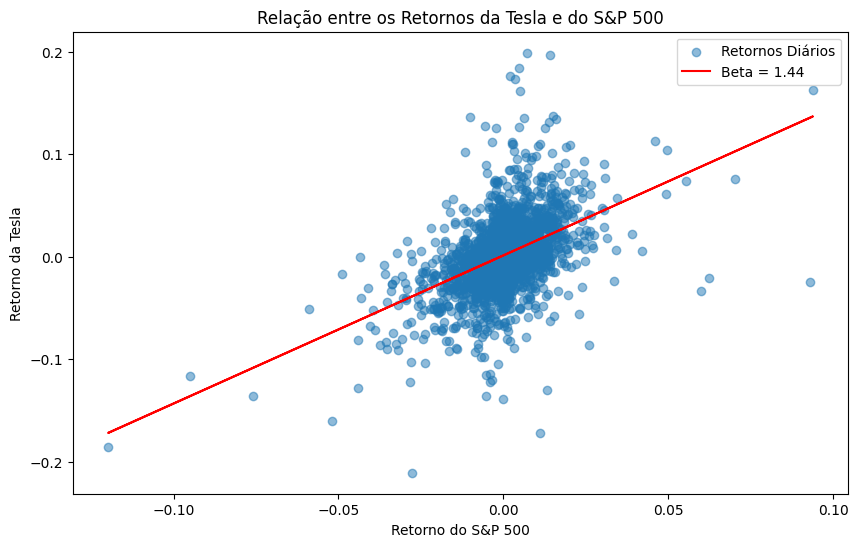

In [18]:
# Plotar a relação entre os retornos da Tesla e do S&P 500
plt.figure(figsize=(10,6))
plt.scatter(returns[market_ticker], returns[stock_ticker], alpha=0.5, label='Retornos Diários')
plt.xlabel("Retorno do S&P 500")
plt.ylabel("Retorno da Tesla")
plt.title("Relação entre os Retornos da Tesla e do S&P 500")

# Ajustar uma reta de regressão para visualizar o Beta
m, b = np.polyfit(returns[market_ticker], returns[stock_ticker], 1)
plt.plot(returns[market_ticker], m * returns[market_ticker] + b, color='red', label=f'Beta = {beta:.2f}')
plt.legend()
plt.show()